##  **Unveiling the Android App Market: Analyzing Google Play Store Data:**

### **Data Preparation:**
- **Description:** In this section, we will clean the dataset and correct data types to ensure accuracy

### 1. Data Loading and Overview:

### Loading the Dataset:

In [1]:
import pandas as pd

apps_path = 'apps.csv'
reviews_path = 'user_reviews.csv'
apps_df= pd.read_csv(apps_path)
reviews_df= pd.read_csv(reviews_path)

### Getting an overview of the Datasets:

In [2]:
apps_df.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
reviews_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


### 2. Checking for Missing Values:

In [4]:
# Checking for missing values in the apps dataset
apps_df.isnull().sum()


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
# Checking for missing values in the reviews dataset
reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### Summary of Data Loading and Missing Values

- After loading the datasets, we checked for missing values in both the `apps.csv` and `user_reviews.csv` files. Below are the findings:

1. **apps.csv**:
   - The `Rating` column has **1463** missing values.
   - The `Size` column has **1227** missing values.
   - The `Current Ver` column has **8** missing values.
   - The `Android Ver` column has **2** missing values.

2. **user_reviews.csv**:
   - The `Translated_Review` column has **26868** missing values.
   - The `Sentiment` column has **26863** missing values.
   - The `Sentiment_Polarity` column has **26863** missing values.
   - The `Sentiment_Subjectivity` column has **26863** missing values.

- These missing values will need to be addressed to ensure the accuracy and consistency of our analysis.
- Next, we will handle these missing values to ensure our data is clean and ready for analysis.

### 3. Handling Missing Values:

In [6]:
# Handling missing values in the apps dataset

# Fill missing Rating values with the median rating
apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace=True)

# Fill missing Size values with the median size
apps_df['Size'].fillna(apps_df['Size'].median(), inplace=True)

# Fill missing Current Ver and Android Ver with the most frequent value
apps_df['Current Ver'].fillna(apps_df['Current Ver'].mode()[0], inplace=True)
apps_df['Android Ver'].fillna(apps_df['Android Ver'].mode()[0], inplace=True)

# Handling missing values in the reviews dataset

# Drop rows with missing Sentiment-related data
reviews_df.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)


In [7]:
# Checking if any missing values remain
apps_df.isnull().sum(), reviews_df.isnull().sum()

(Unnamed: 0        0
 App               0
 Category          0
 Rating            0
 Reviews           0
 Size              0
 Installs          0
 Type              0
 Price             0
 Content Rating    0
 Genres            0
 Last Updated      0
 Current Ver       0
 Android Ver       0
 dtype: int64,
 App                       0
 Translated_Review         0
 Sentiment                 0
 Sentiment_Polarity        0
 Sentiment_Subjectivity    0
 dtype: int64)

In [8]:
# Checking if any missing values remain
reviews_df.isnull().sum(), reviews_df.isnull().sum()

(App                       0
 Translated_Review         0
 Sentiment                 0
 Sentiment_Polarity        0
 Sentiment_Subjectivity    0
 dtype: int64,
 App                       0
 Translated_Review         0
 Sentiment                 0
 Sentiment_Polarity        0
 Sentiment_Subjectivity    0
 dtype: int64)

### Summary of Missing Values Handling

- Missing values in the `Rating`, `Size`, `Current Ver`, and `Android Ver` columns of the apps dataset have been filled.
- Missing sentiment data in the reviews dataset has been dropped to focus on reviews with sentiment information.

The data is now clean and ready for further analysis.

---

Next, we will explore the app distribution across categories and conduct metrics analysis.

### 4. Category Exploration:

- In this section, we will analyze the distribution of apps across different categories to understand the diversity in the app market.


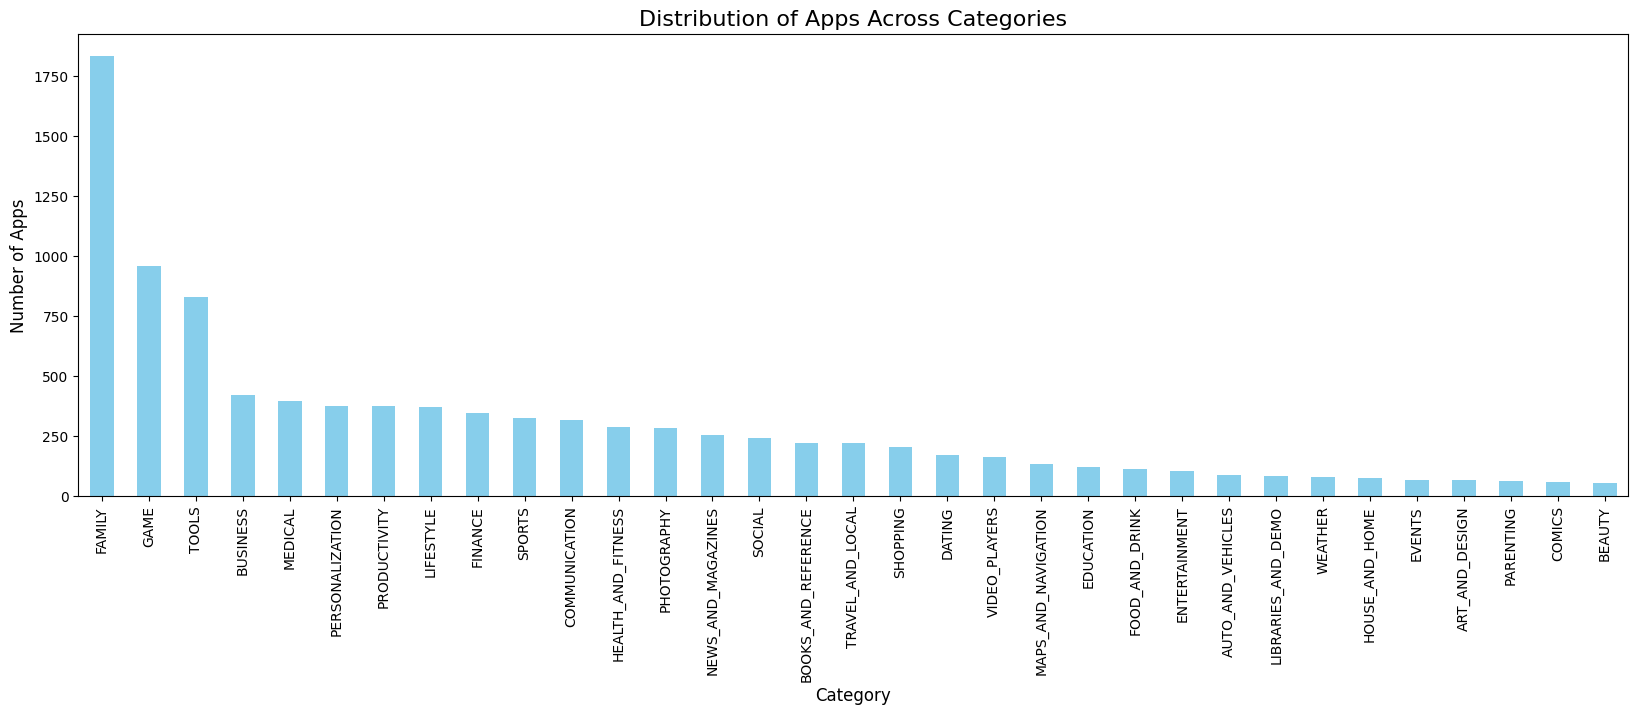

In [9]:
# Count of apps per category
category_counts = apps_df['Category'].value_counts()

# Visualizing the distribution of apps across categories
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Apps Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=90)
plt.show()


### Insights:
- This plot provides a clear view of which categories have the most apps available on the Play Store.
- Further analysis could explore the popularity, ratings, and pricing within each category.


### 5. Metrics Analysis (Ratings, Size, Popularity, Pricing):

- In this section, we will explore key metrics like app ratings, sizes, popularity (installs), and pricing trends.


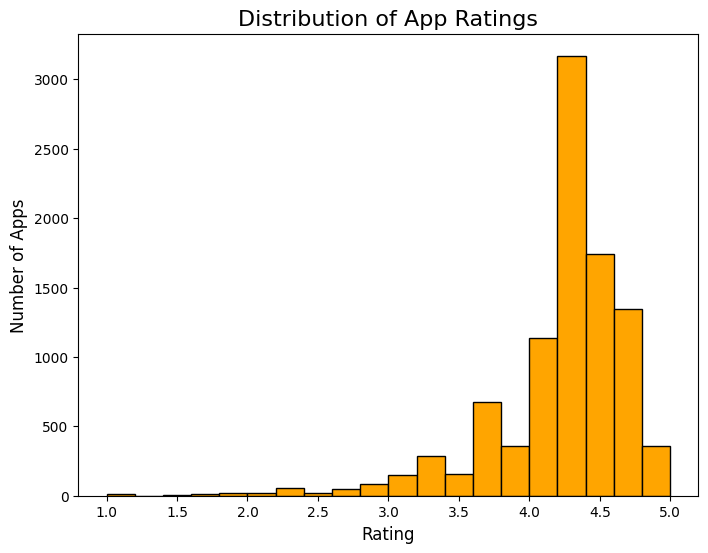

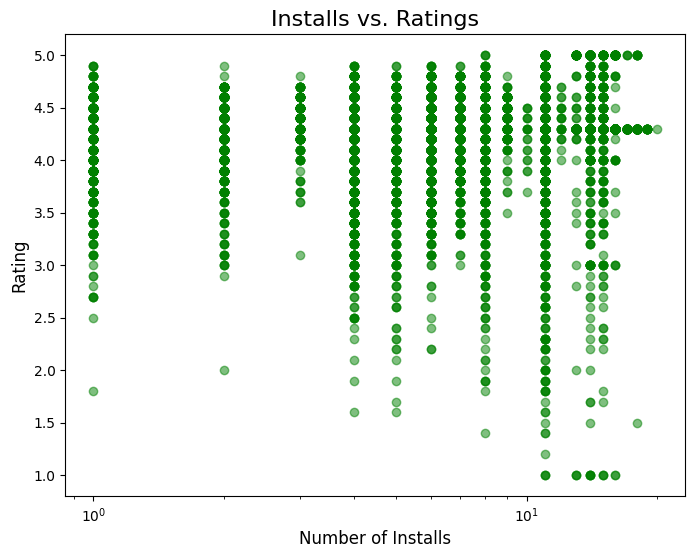

In [10]:
# Distribution of App Ratings
plt.figure(figsize=(8,6))
plt.hist(apps_df['Rating'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.show()

# Popularity Trend: Installs vs. Ratings
plt.figure(figsize=(8,6))
plt.scatter(apps_df['Installs'], apps_df['Rating'], color='green', alpha=0.5)
plt.title('Installs vs. Ratings', fontsize=16)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xscale('log')
plt.show()


### Insights:
- The histogram of app ratings shows the general distribution of ratings across apps.
- The scatter plot of installs vs. ratings shows if there is any correlation between an app's popularity and its quality (rating).


### Deeper Metrics Analysis:

- Correlation between different variables like app size, rating, and installs.
- Pricing trends: Analyze paid app prices and check if there's a correlation between price and rating.

We'll first explore correlations. Let's begin by examining the relationships between:

- App size and rating
- App size and installs
- Rating and installs

### 1. Correlation Analysis:

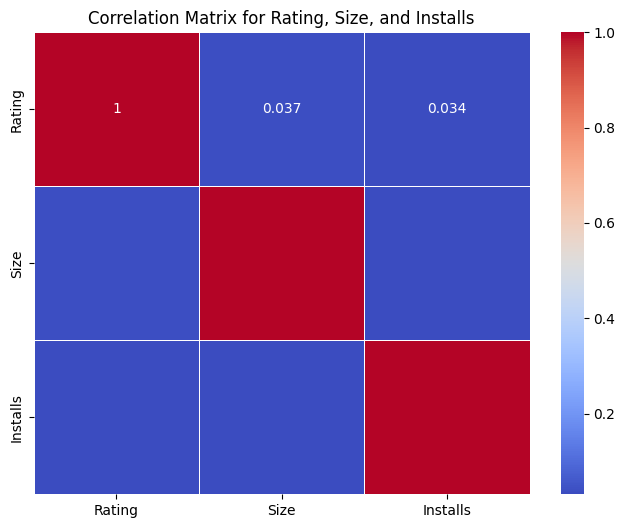

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Size' to numeric by handling non-string values first
apps_df['Size'] = apps_df['Size'].replace('Varies with device', pd.NA)

# Apply string replacement only to valid string entries
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace('M', '').replace('k', '') if isinstance(x, str) else x)

# Convert the Size column to numeric (MB for 'M', KB for 'k', and NaN where applicable)
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')

# Create a correlation matrix for selected numerical columns
correlation_matrix = apps_df[['Rating', 'Size', 'Installs']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Rating, Size, and Installs')
plt.show()



#### Insights:
- The heatmap shows the correlation between app size, rating, and installs.
- A positive or negative value close to 1 or -1 indicates a strong correlation, while a value close to 0 indicates no correlation.
- We can observe whether app size is correlated with higher ratings or installs and analyze the strength of these relationships.


### 2. Scatter Plot: App Size vs Rating:

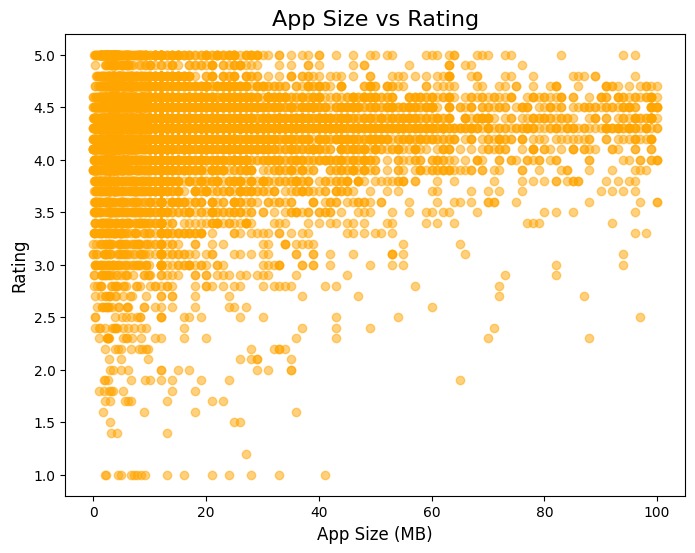

In [28]:
# Scatter plot for App Size vs Rating
plt.figure(figsize=(8, 6))
plt.scatter(apps_df['Size'], apps_df['Rating'], alpha=0.5, color='orange')
plt.title('App Size vs Rating', fontsize=16)
plt.xlabel('App Size (MB)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()


#### Insights:
- This scatter plot shows the relationship between app size and rating.
- By looking at the plot, we can determine if larger apps tend to have higher or lower ratings.
- If the points are scattered randomly, it indicates that app size does not significantly impact the app's rating.


### 3. Scatter Plot: App Size vs Installs:

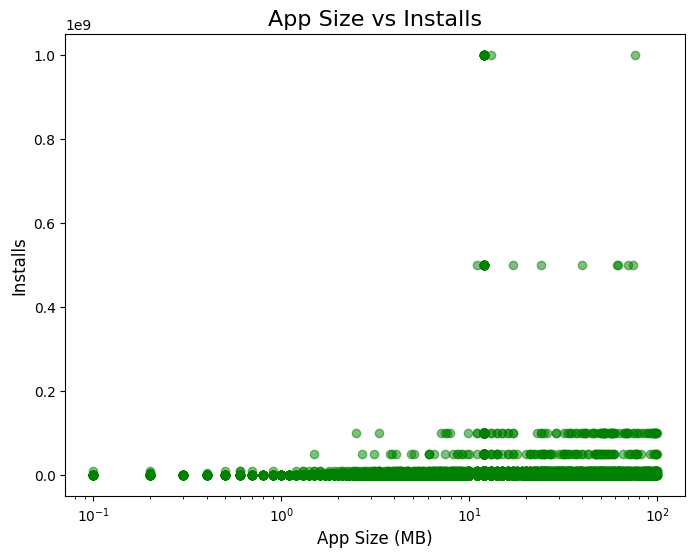

In [29]:
# Scatter plot for App Size vs Installs
plt.figure(figsize=(8, 6))
plt.scatter(apps_df['Size'], apps_df['Installs'], alpha=0.5, color='green')
plt.title('App Size vs Installs', fontsize=16)
plt.xlabel('App Size (MB)', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.xscale('log')
plt.show()


#### Insights:
- This scatter plot shows how app size is related to the number of installs.
- If there is a clear pattern, such as an increase in installs with larger apps, it indicates that app size might play a role in an app's popularity.
- The use of a log scale on the x-axis helps better visualize apps with a wide range of installs.


### 4. Scatter Plot: Rating vs Installs:

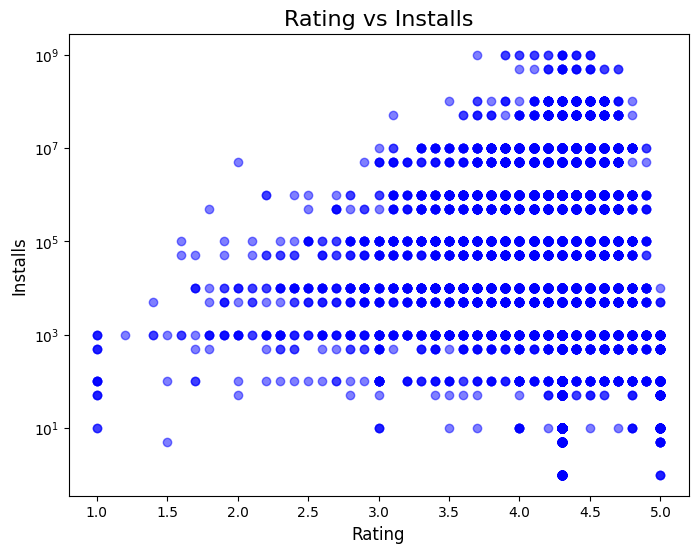

In [30]:
# Scatter plot for Rating vs Installs
plt.figure(figsize=(8, 6))
plt.scatter(apps_df['Rating'], apps_df['Installs'], alpha=0.5, color='blue')
plt.title('Rating vs Installs', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.yscale('log')
plt.show()


#### Insights:
- This scatter plot shows the relationship between an app's rating and the number of installs.
- By examining the plot, we can check if higher-rated apps tend to have more installs, which might indicate that better-quality apps (as rated by users) are also more popular.
- The use of a log scale on the y-axis helps to display apps with fewer installs and those with millions of installs on the same plot.


### 6. Sentiment Analysis:

- In this section, we will assess user sentiments based on the reviews dataset. 
- We'll examine the polarity and subjectivity of the reviews to understand user feedback trends for different apps.


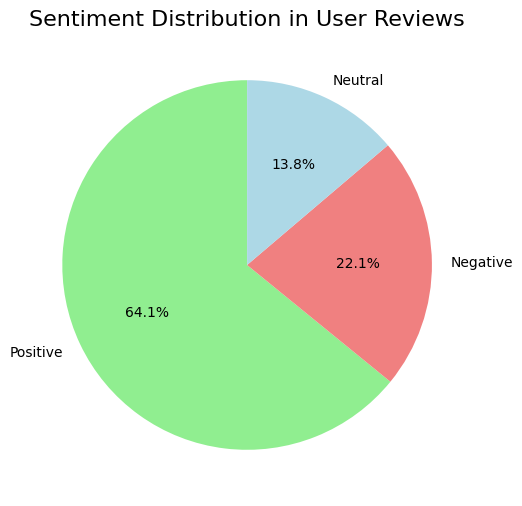

In [11]:
# Check the distribution of sentiment types
sentiment_counts = reviews_df['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(6,6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'], startangle=90)
plt.title('Sentiment Distribution in User Reviews', fontsize=16)
plt.ylabel('')
plt.show()


#### Insights:
- The pie chart shows the distribution of user sentiments in the reviews.
- By analyzing the proportion of Positive, Neutral, and Negative sentiments, we can gauge the general user satisfaction across apps.
- If positive sentiments dominate, this indicates a generally satisfied user base. A significant percentage of negative sentiments could point to user dissatisfaction and potential areas for improvement.


### 7. Sentiment Polarity and Subjectivity:

- In this section, we will visualize how positive or negative the reviews are (`Sentiment_Polarity`) and how subjective they tend to be (`Sentiment_Subjectivity`).


#### Sentiment Polarity (How Positive or Negative the Review Is):

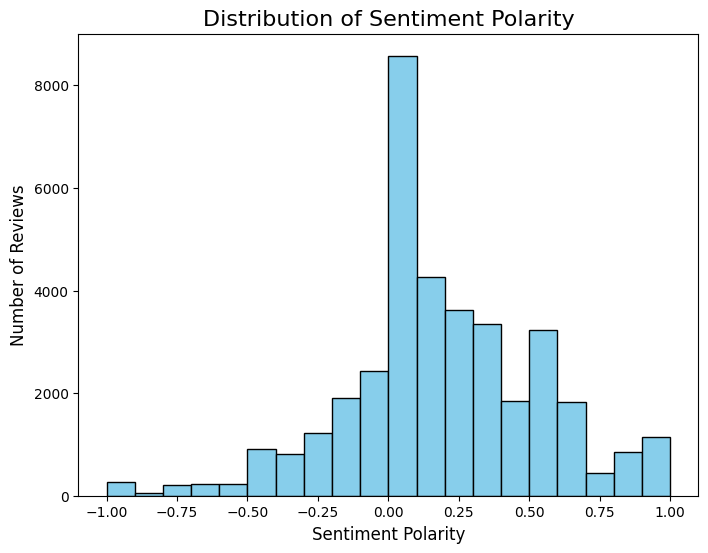

In [33]:
# Visualizing the distribution of Sentiment Polarity
plt.figure(figsize=(8,6))
plt.hist(reviews_df['Sentiment_Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()


#### Insights:
- The sentiment polarity histogram shows how positive or negative the reviews are, with values close to 1 being highly positive and values closer to -1 being highly negative.
- This gives an overview of the emotional tone of user reviews and allows us to identify patterns in the types of apps that receive more positive or negative feedback.


#### Sentiment Subjectivity (How Subjective the Review Is):

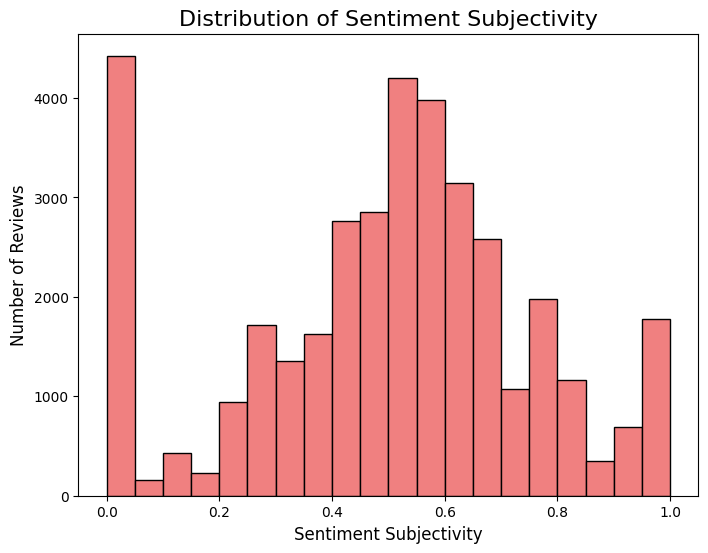

In [34]:
# Visualizing the distribution of Sentiment Subjectivity
plt.figure(figsize=(8,6))
plt.hist(reviews_df['Sentiment_Subjectivity'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sentiment Subjectivity', fontsize=16)
plt.xlabel('Sentiment Subjectivity', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

### Insights:
- The sentiment polarity histogram shows the distribution of how positive or negative user reviews are, with values close to 1 being more positive and values closer to -1 being more negative.
- The sentiment subjectivity histogram reflects how subjective the reviews are, with values close to 1 being highly subjective and values closer to 0 being more objective.


### 8. Interactive Visualization:

- For a more interactive experience, we can utilize libraries like Plotly or ipywidgets to allow dynamic exploration of the data.


In [13]:
# Example using Plotly for an interactive sentiment polarity visualization
import plotly.express as px

fig = px.histogram(reviews_df, x="Sentiment_Polarity", nbins=30, title="Interactive Sentiment Polarity Distribution")
fig.show()


### 9. Comparing Popular Apps Across Categories:

- We will analyze the highest-rated apps in each category to see which categories contain the most popular apps.


In [14]:
# Getting top-rated apps in each category
top_rated_apps = apps_df.groupby('Category').apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)

# Display top-rated apps per category
top_rated_apps[['App', 'Category', 'Rating', 'Reviews', 'Installs']]


,App,Category,Rating,Reviews,Installs
0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,100+
1,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,"100,000+"
2,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,"1,000,000+"
3,R Programing Offline Tutorial,BOOKS_AND_REFERENCE,5.0,4,"1,000+"
4,Ag Valley Cooperative,BUSINESS,5.0,6,500+
5,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,"1,000+"
6,BS-Mobile,COMMUNICATION,5.0,1,50+
7,American Girls Mobile Numbers,DATING,5.0,5,"1,000+"
8,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,"1,000,000+"
9,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,"1,000,000+"


### 10. Exploring Paid vs. Free Apps:

### Free vs Paid Apps Analysis:
- We will analyze the differences between free and paid apps in terms of ratings, installs, and size.


In [16]:
# Analyzing free vs. paid apps
free_apps = apps_df[apps_df['Type'] == 'Free']
paid_apps = apps_df[apps_df['Type'] == 'Paid']

# Compare average ratings
avg_rating_free = free_apps['Rating'].mean()
avg_rating_paid = paid_apps['Rating'].mean()

# Print results
print(f"Average Rating (Free Apps): {avg_rating_free:.2f}")
print(f"Average Rating (Paid Apps): {avg_rating_paid:.2f}")



Average Rating (Free Apps): 4.19
Average Rating (Paid Apps): 4.27


In [21]:
# Remove '+' and ',' from the 'Installs' column and convert to numeric
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# For free apps
free_apps_df = apps_df.loc[apps_df['Type'] == 'Free']
average_installs_free = free_apps_df['Installs'].mean()

# For paid apps
paid_apps_df = apps_df.loc[apps_df['Type'] == 'Paid']
average_installs_paid = paid_apps_df['Installs'].mean()

print("Average installs for free apps:", average_installs_free)
print("Average installs for paid apps:", average_installs_paid)


Average installs for free apps: 8431491.929237336
Average installs for paid apps: 75879.47222222222


### 1. Free vs. Paid App Rating and Installs Comparison:

In [ ]:
# Compare average ratings and installs between free and paid apps
free_apps = apps_df[apps_df['Type'] == 'Free']
paid_apps = apps_df[apps_df['Type'] == 'Paid']

avg_rating_free = free_apps['Rating'].mean()
avg_rating_paid = paid_apps['Rating'].mean()

avg_installs_free = free_apps['Installs'].mean()
avg_installs_paid = paid_apps['Installs'].mean()

# Display results
print(f"Average Rating (Free Apps): {avg_rating_free:.2f}")
print(f"Average Rating (Paid Apps): {avg_rating_paid:.2f}")
print(f"Average Installs (Free Apps): {avg_installs_free:.2f}")
print(f"Average Installs (Paid Apps): {avg_installs_paid:.2f}")


Average Rating (Free Apps): 4.19
Average Rating (Paid Apps): 4.27
Average Installs (Free Apps): 8431491.93
Average Installs (Paid Apps): 75879.47


#### Insights:
- This comparison reveals the differences between free and paid apps in terms of ratings and installs.
- We can see whether paid apps generally have higher ratings than free apps, which could indicate better quality or user satisfaction.
- Additionally, we can determine if free apps tend to have more installs, highlighting the accessibility and popularity of free apps in the marketplace.


### 2. Pricing Trend Analysis: Free vs. Paid Apps:

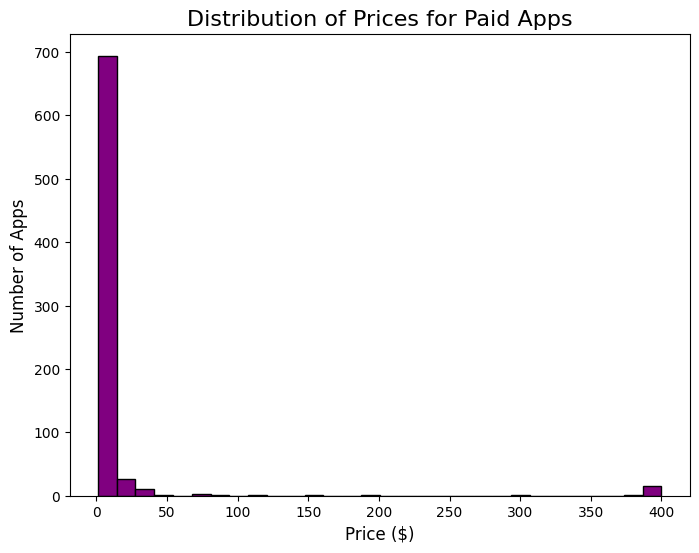

In [31]:
# Convert the Price column to numeric after removing the '$' sign
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

# Analyze the distribution of prices for paid apps
paid_apps = apps_df[apps_df['Type'] == 'Paid']

# Plotting the distribution of app prices
plt.figure(figsize=(8, 6))
plt.hist(paid_apps['Price'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Prices for Paid Apps', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.show()


#### Insights:
- This histogram shows the distribution of prices for paid apps.
- We can see how many apps are priced within different ranges, highlighting trends such as whether most paid apps are affordable or if there are a significant number of premium-priced apps.
- This analysis helps in understanding the pricing strategy in the app market, including the presence of low-cost vs. high-cost paid apps.


---
## **Project Summary: Unveiling the Android App Market:**

This project analyzed Google Play Store data to understand the dynamics of the Android app market. By cleaning and visualizing the data, we gained insights into app distribution, ratings, popularity, pricing trends, and user sentiments. Below are key observations and recommendations based on the analysis:

### **Observations:**
1. **App Category Distribution**: \
Categories like 'Family', 'Game', and 'Tools' dominate the Play Store, while niche categories such as 'Beauty' and 'Parenting' have significantly fewer apps.

2. **App Ratings**: \
Most apps maintain a rating between 3.5 and 4.5. Higher-rated apps tend to be popular, but there is no strong correlation between app size and rating.

3. **Installs and Popularity**: \
Free apps have significantly higher installs compared to paid apps. Despite this, paid apps generally maintain a slightly higher average rating than free apps.

4. **Sentiment Analysis**: \
A majority of the reviews are positive, with a small proportion of negative or neutral sentiments. Sentiment polarity indicates that users are generally satisfied with their app experiences, especially in categories such as 'Education' and 'Entertainment.'

5. **App Pricing**: \
Paid apps are mostly priced under $10, with only a small number of high-end apps priced above that range. The majority of paid apps fall within a low to mid-range price bracket.

### **Recommendations for Play Store Sales:**
1. **Capitalize on Free Apps**: \
Given that free apps see far higher install numbers, app developers should consider freemium models where the core app is free, but additional features are paid. This can maximize installs while generating revenue from in-app purchases or premium upgrades.

2. **Focus on User Reviews and Ratings**: \
Apps with higher ratings tend to have better installs. Encouraging users to leave positive reviews and responding to negative feedback can help improve app ratings, leading to greater visibility and trust in the Play Store.

3. **Optimize App Size**: \
Although app size does not directly correlate with ratings or installs, ensuring the app size is manageable will enhance user experience, especially for users in regions with limited storage space or slower internet speeds.

4. **Target Underserved Categories**: \
Developers could explore less saturated categories such as 'Parenting', 'Beauty', or 'Events' to increase visibility and reduce competition. This is an opportunity to introduce innovative solutions that cater to niche audiences.

5. **Price Strategically**: \
For paid apps, keeping prices in the low to mid-range could help drive more sales. Alternatively, offering time-limited discounts or promotions may encourage users to explore premium apps without commitment.

By leveraging these insights, app developers and marketers can better understand user behavior and trends, optimizing their strategies to maximize visibility, installs, and revenue in the Android app marketplace.
